
#     Travaux Patriques Python  
###                                                               Mathilde Cadon & Arielle Gantelet


In [25]:
run ./utils.py

<Figure size 432x288 with 0 Axes>

In [2]:
Z = [[0,0,0,0,0,0],
[0,0,0,1,0,0],
[0,1,0,1,0,0],
[0,0,1,1,0,0],
[0,0,0,0,0,0],
[0,0,0,0,0,0]]

In [3]:
calcul_nb_voisins(Z)

[[0, 0, 0, 0, 0, 0],
 [0, 1, 3, 1, 2, 0],
 [0, 1, 5, 3, 3, 0],
 [0, 2, 3, 2, 2, 0],
 [0, 1, 2, 2, 1, 0],
 [0, 0, 0, 0, 0, 0]]

La fonction "calcul_nb_voisins" permet de prendre en argument un état du jeu de la vie. 
Cette fonction calcule ensuite, pour chaque cellule vivante, le nombre de cellules vivantes qui sont dans son entourage (les 8 cases autour d'elle). 
Elle renvoie donc une liste de liste contenant, non plus des 0 ou des 1 pour dire que la cellule est morte ou vivante, mais le nombre de cellules qui sont présentes autour d'elle.

In [4]:
help(iteration_jeu)

Help on function iteration_jeu in module __main__:

iteration_jeu(Z)
    Fonction qui prend en argument l'état initial du jeu de la vie (sous forme de liste de liste).
    Fonction qui retourne l'état du jeu après 1 itération.
    
    La fonction fait appel à la fonction qui calcule le nombre de voisins puis modifie
    les cellules, qui sont représentées par des 0 ou des 1 dans la matrice Z,
    en appliquant la règle de décision expliquée ci dessus.



In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math

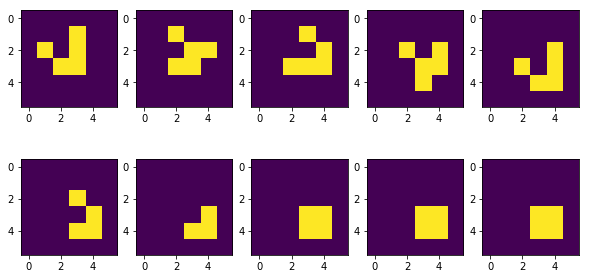

In [6]:
plt.figure(figsize=(10,5))
Zbis = np.copy(Z)
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(np.array(Zbis))
    Zbis = iteration_jeu(Zbis)

Entre l'itération 0 et 4 on observe que les cellules évoluent et que l'on a un nouvel état à chaque itération.
Lors de l'étape 4 on se retrouve dans le même état que l'étape 0 mais en étant décalé de 1 vers le bas droite. 

A partir de l'itération 7, le jeu est stable et ne bougera donc plus.

##  Implémentation avec Numba

In [7]:
import time

#Attention probleme avec le jit comme c'est un languageproche de C il n'aime pas les liste de liste, il faut donc appeler
    la fonction avec np.array pour que cela fonctionne...

In [8]:
# COMPILATION INCLUSE!
start = time.time()
calcul_nb_voisins_fast(np.array(Z))
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

# COMPILATION NON INCLUSE, EXECUTER DEPUIS LE CACHE
start = time.time()
calcul_nb_voisins_fast(np.array(Z))
end = time.time()
print("Elapsed (after compilation) = %s" % (end - start))

# VANILLA PYTHON
start = time.time()
calcul_nb_voisins(Z)
end = time.time()
print("Elapsed (vanilla) = %s" % (end - start))

Elapsed (with compilation) = 0.4170873165130615
Elapsed (after compilation) = 0.0
Elapsed (vanilla) = 0.0


In [9]:
# COMPILATION INCLUSE!
start = time.time()
iteration_jeu_fast(np.array(Z))
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

# COMPILATION NON INCLUSE, EXECUTER DEPUIS LE CACHE
start = time.time()
iteration_jeu_fast(np.array(Z))
end = time.time()
print("Elapsed (after compilation) = %s" % (end - start))

# VANILLA PYTHON
start = time.time()
iteration_jeu(np.array(Z))
end = time.time()
print("Elapsed (vanilla) = %s" % (end - start))

Elapsed (with compilation) = 0.20345640182495117
Elapsed (after compilation) = 0.0009975433349609375
Elapsed (vanilla) = 0.0


In [10]:
Z_huge = np.zeros((100, 100))
Z_np = np.array(
[[0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0],
[0, 1, 0, 1, 0, 0],
[0, 0, 1, 1, 0, 0],
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0]])
Z_huge[10:16, 10:16] = Z_np

In [11]:
def iteration(nb_iter):
    plt.figure(figsize=(25,20))
    Zbis = np.copy(Z_huge)
    for i in range(nb_iter):
        plt.subplot(math.ceil(nb_iter/5),5,i+1)
        plt.imshow(np.array(Zbis))
        Zbis = iteration_jeu(Zbis)

In [12]:
from ipywidgets import interact, fixed

interact(iteration, nb_iter=(1, 100, 1));

interactive(children=(IntSlider(value=50, description='nb_iter', min=1), Output()), _dom_classes=('widget-inte…

## Exercice 2

In [12]:
from sklearn.datasets import fetch_mldata
from random import randint

In [13]:
mnist = fetch_mldata('MNIST original')
X = mnist.data.astype('float64')
y = mnist.target


C:\Users\ariel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\ariel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


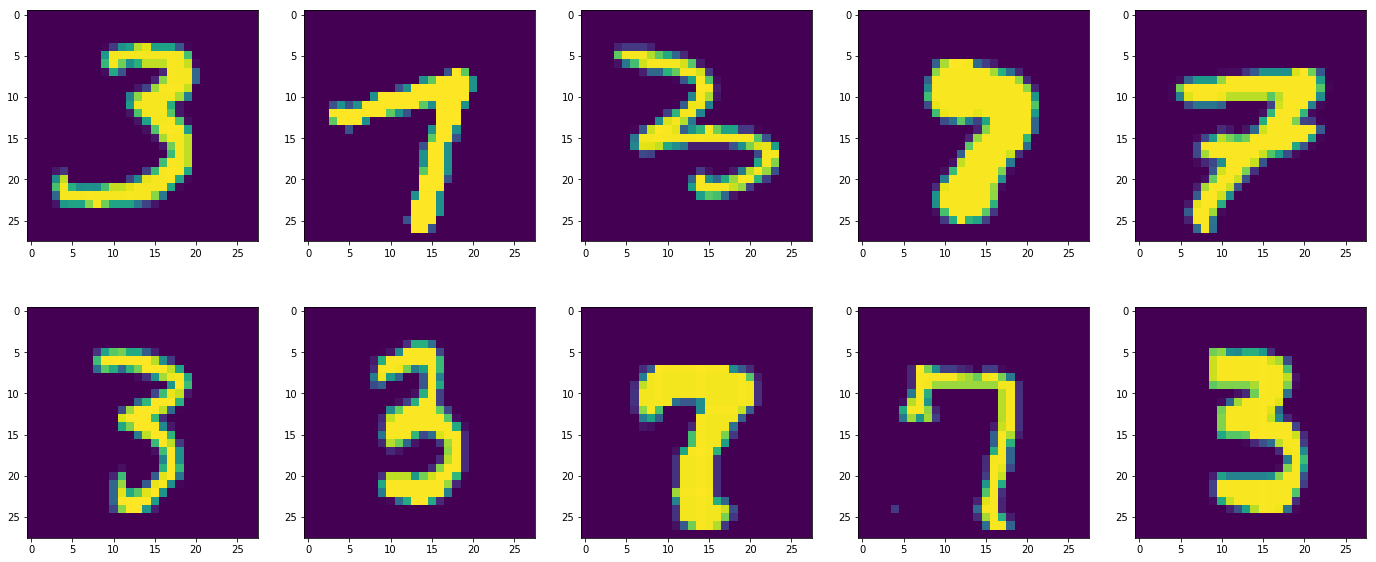

In [14]:
mask1 = np.array(y==3)
mask2 = np.array(y==7)
mask = mask1+mask2  #somme terme à terme
X37 = X[mask]
y37 = y[mask]

plt.figure(figsize=(24,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow((X37[randint(0,len(X37)-1)]).reshape(28,28))

In [22]:
from sklearn import linear_model

skl_linmod = linear_model.LogisticRegression(fit_intercept=False)

In [28]:
skl_linmod.fit(X37,y37)

C:\Users\ariel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
interact(fig_digit,  x=fixed(X37[1000]), w=fixed(skl_linmod.coef_.T), alpha=(0.1, 100, 0.1));

NameError: name 'interact' is not defined

In [39]:
import matplotlib.animation as animation

from matplotlib import rc
from IPython.display import HTML

RuntimeError: Requested MovieWriter (ffmpeg) not available

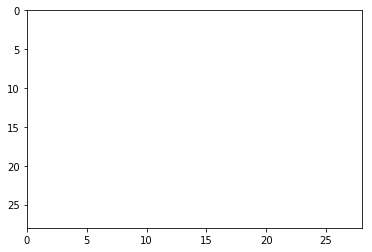

In [42]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, 28))
ax.set_ylim((28, 0))

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

anim = animation.FuncAnimation(fig, fig_digit, init_func=init,
                               frames=100, interval=20, blit=True)

HTML(anim.to_html5_video())

In [ ]:
help(animation.FuncAnimation)